# Trabajo Practico N° 6

## Enunciado

1. Tomar el dataset seleccionado para el ejercicio de la clase pasada y hacerle un PCA. Mostrar cómo está explicada la varianza en base a los distintos componentes principales.
2. Mostrar gráficamente cómo el primer y el segundo componente principal describen la varianza de los datos (hacer un gráfico similar al mostrado en esta clase con el Iris dataset pero para el nuevo dataset).
3. Entrenar nuevamente uno de los clasificadores seleccionados para el ejercicio pasado para un conjunto de componentes principales que considere conveniente, utilizando la correspondiente semilla de random_state. Mostrar cuánto difiere el error de test con respecto al modelo utilizado en el ejercicio anterior. (Nota: la cantidad de componentes utilizada debe ser menor a la cantidad de features del conjunto original).
4. Responder: bajo su criterio, ¿se justifica realizar la transformación de los features con PCA para el dataset seleccionado? Explicar por qué; en caso afirmativo, ¿cuántos componentes principales seleccionaría y por qué?

Fecha de entrega: **24/05/2017**

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

## Desarrollo

#### Cargamos el dataset de phising y realizamos el PCA sobre el mismo.

Cargamos el dataset

In [1]:
import numpy as np
import pandas as pd
nombres = ["has_ip", "long_url", "short_service", "has_at", "double_slash_redirect", "pref_suf", "has_sub_domain", "ssl_state", "long_domain", "favicon", "port", "https_token", "req_url", "url_of_anchor", "tag_links", "SFH", "submit_to_email", "abnormal_url", "redirect", "mouseover", "right_click", "popup", "iframe", "domain_Age", "dns_record", "traffic", "page_rank", "google_index", "links_to_page", "stats_report", "target"]
data=pd.read_csv("phising.csv", header=None, names=nombres)
x = np.array(data)
# Eliminamos la columna del resultado (target)
x = np.delete(x, 30, axis=1)
y = np.array(data.target)

Creamos la semilla

In [2]:
semilla = np.random.RandomState(3)

Normalizamos los datos

In [3]:
from scipy import stats
x_norm = stats.zscore(x)

Instanciamos el PCA

In [4]:
from sklearn.decomposition import PCA
pca = PCA(random_state=semilla)
pca.fit(x_norm)

PCA(copy=True, iterated_power='auto', n_components=None,
  random_state=<mtrand.RandomState object at 0x7fe64fdc9e58>,
  svd_solver='auto', tol=0.0, whiten=False)

Guardamos los datos transformados linealmente con respecto a los componentes principales

In [5]:
x_transformado = pca.transform(x_norm)

A continuacion mostramos los componentes de PCA ordenados:

In [6]:
print('Componentes de PCA (ordenados desc. desde el 1° hasta el 5to vector): \n\n', pca.components_) 

Componentes de PCA (ordenados desc. desde el 1° hasta el 5to vector): 

 [[  2.60863776e-01   6.46845636e-02   2.54328174e-01  -6.32769851e-02
    2.58285672e-01   3.72620455e-02   1.78620314e-03   1.60891868e-02
   -5.88711699e-02   2.76835323e-01   2.69745150e-01   2.38075629e-01
    2.85226712e-02  -5.51106736e-03   8.25483145e-02   6.05022909e-02
    2.64432593e-01   2.63934281e-01   2.47207370e-01   2.62192092e-01
    1.91884642e-01   2.77076698e-01   2.44290935e-01   1.75756299e-02
    1.27005292e-01   5.74920036e-02  -1.77724840e-02  -2.95370068e-02
    1.16117728e-01   3.04507670e-01]
 [  3.17631738e-01   5.72404274e-02   3.12654364e-01   9.87683419e-03
    3.08657522e-01   7.17271837e-02   3.22497481e-02   5.73981181e-02
   -5.17860659e-02  -2.63251202e-01  -2.75023468e-01   2.84422384e-01
    4.22722915e-02   4.66025612e-02   3.90409966e-02   5.52297678e-02
   -2.37331380e-01   2.55022868e-01   3.01533650e-01  -2.24546883e-01
   -1.84238160e-01  -2.50826774e-01  -2.50272436e-

Ahora mostramos el monto de la varianza explicado por cada componente 

In [7]:
print(pca.explained_variance_)

[ 6.15026293  4.90830046  3.04129766  2.19057562  1.34912795  1.30066401
  1.15054435  1.07249023  0.99693799  0.84080855  0.81444775  0.75105585
  0.7023255   0.65508506  0.60382856  0.52385956  0.4955594   0.39173143
  0.37804289  0.30908942  0.29051198  0.25371287  0.20926639  0.16836934
  0.15859286  0.09410855  0.07394528  0.05236768  0.04253064  0.03055925]


####  Mostramos cómo está explicada la varianza en base a los distintos componentes principales

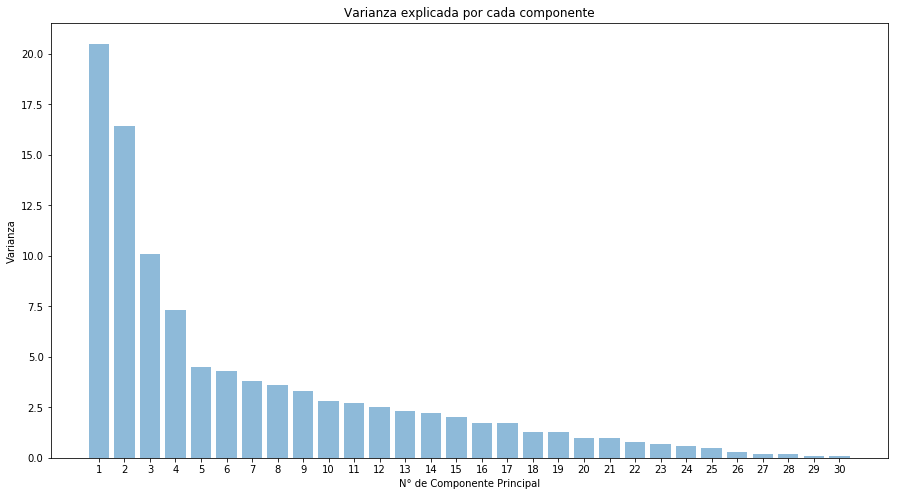

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
y_pos = np.arange(30)
# pca.explained_variance_ratio_ es quien nos devuelve el gráfico de la varianza
plt.bar(y_pos, np.round(100 * pca.explained_variance_ratio_,
                        decimals=1), align='center', alpha=0.5)
plt.xticks(y_pos, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

#### 2. Mostramos gráficamente cómo el primer y el segundo componente principal describen la varianza de los datos.

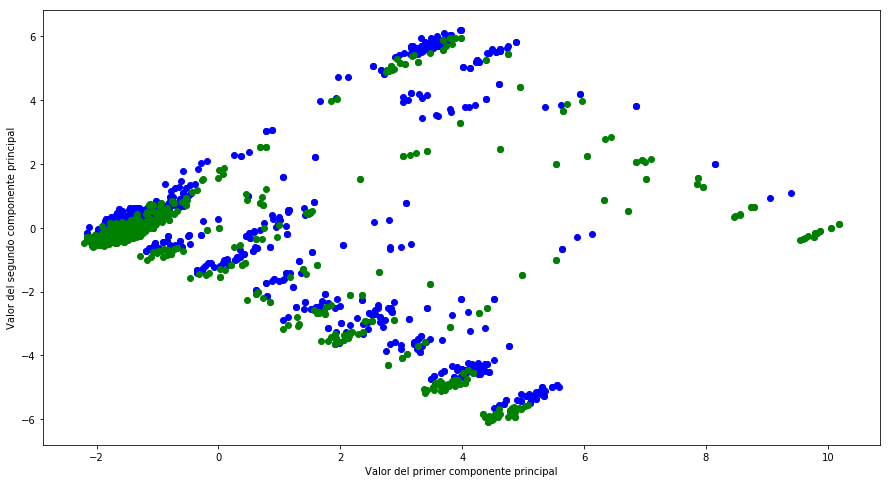

In [9]:
plt.figure(figsize=(15,8))
plot = plt.scatter(x_transformado[y==-1, 0], x_transformado[y==-1, 1], color='blue')
plot = plt.scatter(x_transformado[y==1, 0], x_transformado[y==1, 1], color='green')
plt.xlabel('Valor del primer componente principal')
plt.ylabel('Valor del segundo componente principal')
plt.show()

#### 3. Entrenamos un clasificador KNN con la cantidad de componentes principales mas convenientes

Dividimos los datos en train y test. Instanciamos el clasificador KNN y lo entrenamos, probando con la distinta cantidad de componentes, la que nos de una tasa de aciertos mayor o igual a 0.96, que es la del trabajo anterior.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
for i in range(1, len(x_transformado[0])):
    X_train, X_test, y_train, y_test = train_test_split(x_transformado[:,0:i], y, random_state=semilla)
    clf = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=6)
    clf.fit(X_train, y_train)
    if clf.score(X_test,y_test) >= 0.96:
        print('El numero de componentes principales a usar es: ', i, '. Da una tasa de aciertos de: ', clf.score(X_test, y_test))
        break

El numero de componentes principales a usar es:  4 . Da una tasa de aciertos de:  0.960912052117


Predecimos

In [11]:
y_hat = clf.predict(X_test)

Mostramos la confusion matrix y la formateamos

In [12]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_hat, labels=[-1,1])
print(cm)

# Formateamos la confussion matrix
list1 = ["Real no fishing (-1)", "Real fishing (1)"]
list2 = ["Predicho no fishing (-1)", "Predicho fishing (1)"]
pd.DataFrame(cm, list1, list2)

[[333  16]
 [  8 257]]


,Predicho no fishing (-1),Predicho fishing (1)
Real no fishing (-1),333,16
Real fishing (1),8,257


Mostramos los resultados

In [13]:
print(metrics.classification_report(y_test, y_hat, target_names=['no phising', 'phising']))

             precision    recall  f1-score   support

 no phising       0.98      0.95      0.97       349
    phising       0.94      0.97      0.96       265

avg / total       0.96      0.96      0.96       614



#### 4. Justificacion del uso de PCA.

Bajo mi criterio personal, y teniendo en cuenta el caso de estudio con el dataset elegido, aplicar PCA es de mucha utilidad, ya que de 30 dimensiones podemos utilizar solo 4 teniendo la misma presicion en los resultados obtenidos. Se escogieron 4 componentes principales debido a que no hay perdida en la tasa de aciertos. Ademas se reduce en mucha cantidad las dimensiones, lo que hace un dataset mas pequeño y manejable.